# Titanic - Machine Learning From Disaster

The Challenge:
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

### Work Flow:
Data ---> Data Preprocessing ---> Feature Engineering ---> Data Analysis ---> Model Preparation ---> Model Evaluation

In [2]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

We first import basic libraries we will use for this challenge

### Data

In [3]:
# loading the data
titanic = pd.read_csv('train.csv')

# checking the size of the dataframe
print(f"Shape of dataframe: {titanic.shape}")

# print the first five rows of the dataframe
titanic.head()

Shape of dataframe: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


On loading the data, we check the size of the dataframe and the first 5 rows.

The size is given as (891, 12) implying there are 12 columns and 891 rows, which is quite simple for this challenge.

Looking at the first five rows, the columns present are the passenger id,survived column, passenger class, name, gender, age, sibling or spouse, parent or children, ticket, fare, cabin and embarkation port.

Let's move onward!

### Data Preprocessing

###### perform some basic data preprocessing

In [4]:
# finding some information on the dataframe
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We notice that there are 5 integer columns, 2 float columns, 5 object columns

In [5]:
# drop unnecessary columns
titanic = titanic.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

Dropping the Passenger id, name, ticket and cabin columns since they won't help us in predicting the survival rate

In [6]:
# check for missing values
titanic.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

While checking for null values, we notice that age has 177 missing values, and the embarkation port has 2 missing values. In total we have 179 missing values in our necessary dataframe.

In [7]:
# fill missing age values with the median value
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())

We fill the missing values in the age column with the median value of the age column

In [8]:
# fill missing embarked values with mode
titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])

We fill the embarked column with the most occuring data

### Feature Engineering

###### perform feature engineering

In [9]:
# Add a new feature for family size
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch'] + 1

We notice that Siblings, Spouses, Parents, and Children belong to set of information, that is family. With that we can create a new feature called FamilySize, which combines the 'SibSp' and 'Parch' columns into one to indicate family

In [10]:
# Add a new feature for alone/not alone
titanic['IsAlone'] = 0

And for those that boarded alone, we set a new feature called 'IsAlone' to indicate them.

In [11]:
# Set IsAlone to 1 if family size is 1
titanic.loc[titanic['IsAlone'] == 1, 'IsAlone'] = 1

In [12]:
# drop unnecessary columns
titanic = titanic.drop(['SibSp', 'Parch'], axis=1)

When we are done, we drop the 'SibSp' and 'Parch' columns 

### Data Analysis and Visualization

###### finding statistical information fromm the datafram

In [37]:
# Get summary statistics of the numerical columns
titanic.describe()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,IsAlone
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.0
mean,0.383838,2.308642,0.352413,29.361582,32.204208,0.361392,1.904602,0.0
std,0.486592,0.836071,0.477990,13.019697,49.693429,0.635673,1.613459,0.0
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,1.000000,0.0
25%,0.000000,2.000000,0.000000,22.000000,7.910400,0.000000,1.000000,0.0
50%,0.000000,3.000000,0.000000,28.000000,14.454200,0.000000,1.000000,0.0
75%,1.000000,3.000000,1.000000,35.000000,31.000000,1.000000,2.000000,0.0
max,1.000000,3.000000,1.000000,80.000000,512.329200,2.000000,11.000000,0.0


This table can help us easily understand the general statistic information of the dataframe

In [38]:
# Get the information for the various genders onboard 
titanic['Sex'].value_counts()

0    577
1    314
Name: Sex, dtype: int64

We notice that there are 577 males and 314 females on the ship. In other words, there are more males than females aboard the titanic.

In [39]:
# Get the information for the various passenger classes 
titanic['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

We notice there are 3 passenger classes availble on the titanic:
class 1 with 216 people, class 2 with 184 people and class 3 with 491 people. Therefore there were more people in the third class than the others.

In [40]:
# Get the information for the various embarkation ports 
titanic['Embarked'].value_counts()

0    646
1    168
2     77
Name: Embarked, dtype: int64

In [41]:
# Get the information for the survival rate
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Out of the 891 people, we notice 342 survived the accident while 549 didn't make it.

#### perform general visualizations

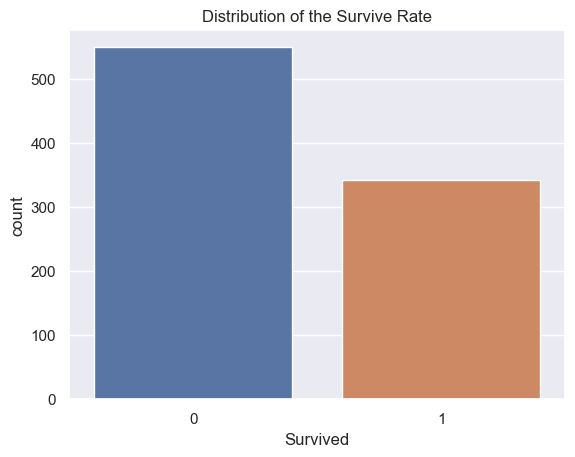

In [66]:
sns.set()

# visualize the distribution of the target variable (Survived)
sns.countplot(x='Survived', data=titanic)
plt.title("Distribution of the Survive Rate")
plt.show()

Looking at the above graph, more people died than survived

###### visualize the distribution of the numerical variables

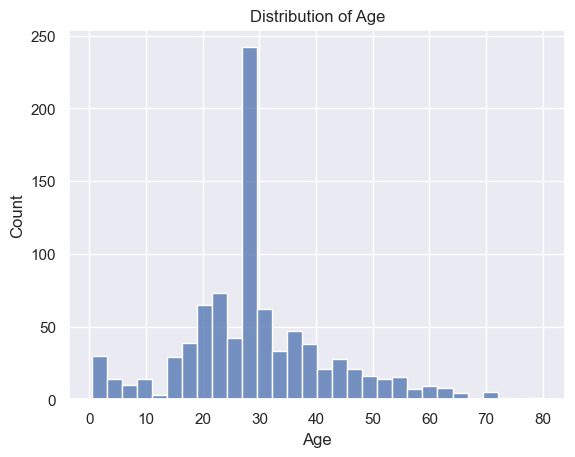

In [67]:
# visualize the distribution of the Age
sns.histplot(x='Age', data=titanic)
plt.title('Distribution of Age')
plt.show()

From the above graph, majority of the people on board were between the ages of 20 and 40, let's confirm this further.

In [68]:
# finding the average age of people onboard
titanic["Age"].mean()

29.36158249158249

from this we find out that on the average, if you should ask of any passenger onborad the titanic, the person should be in their twenties especially 29 years of age, or early 30's. The thrust for adventure!

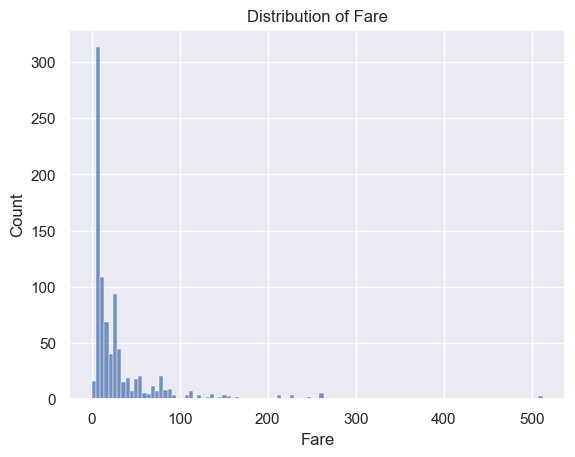

In [69]:
# visualize the distribution of the Fare
sns.histplot(x='Fare', data=titanic)
plt.title('Distribution of Fare')
plt.show()

##### visualize the distribution of the categorical variables

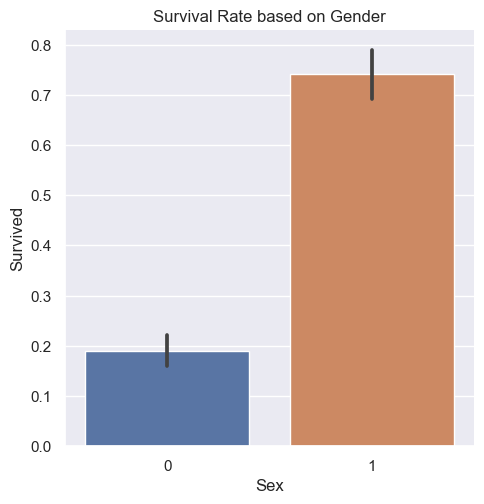

In [70]:
# visualize the relationship between the target variable and gender column
sns.catplot(x='Sex', y='Survived', data=titanic, kind='bar')
plt.title('Survival Rate based on Gender')
plt.show()

From the graph above, checking the survival rate based on gender, we notice more females surviving than males. So despite females being the minority, majority of them were saved.

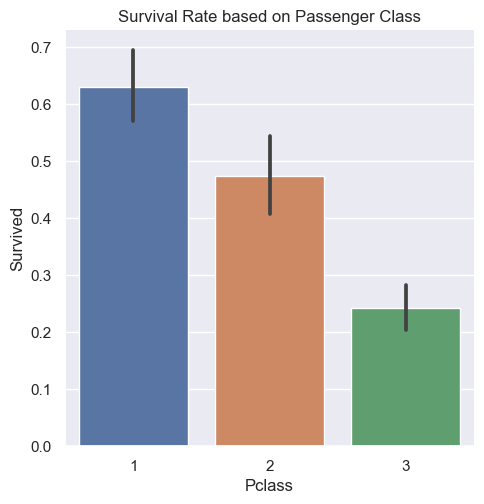

In [71]:
# visualize the relationship between the target variable and passenger class column
sns.catplot(x='Pclass', y='Survived', data=titanic, kind='bar')
plt.title('Survival Rate based on Passenger Class')
plt.show()

From the above graph, people in passenger class 1 we more likely to survive than passengers in class 3. That is the rich survived more.

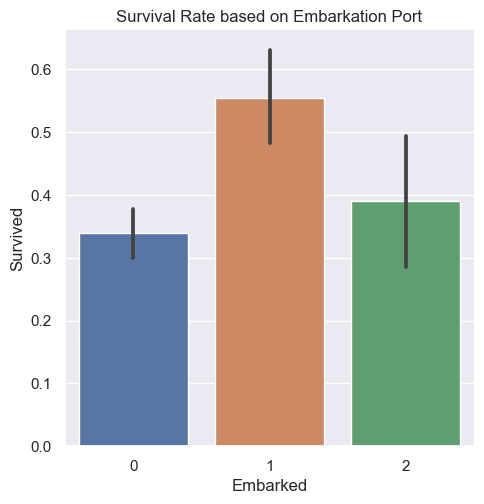

In [72]:
# visualize the relationship between the target variable and embarked column
sns.catplot(x='Embarked', y='Survived', data=titanic, kind='bar')
plt.title('Survival Rate based on Embarkation Port')
plt.show()

This I doubt mattered at the time but we see that those embarking from 'C' (I don't know the port name) survived more, which can imply that majority of the rich and females, came from that port

###### perform visualizations of survival based on features

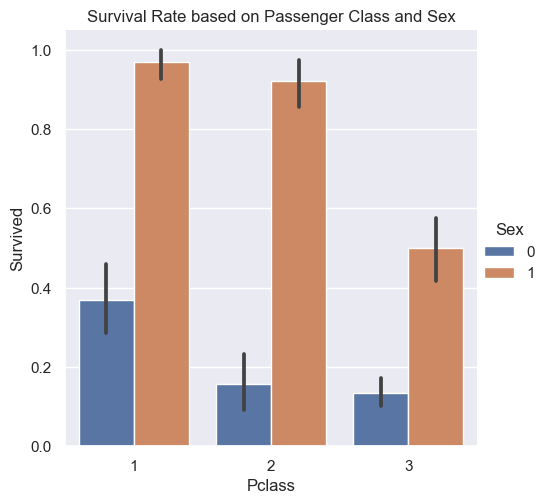

In [73]:
# visualize the survival rate based on passenger class and sex
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=titanic, kind='bar')
plt.title('Survival Rate based on Passenger Class and Sex')
plt.show()

From the above graph, we still notice that despite the class, the females were given priority, and the females in class 1 survived more than females in class 3

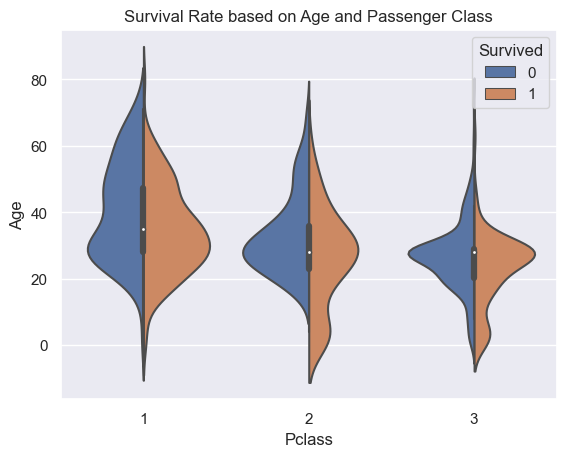

In [74]:
# visualize the survival rate based on age and passenger class
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=titanic, split=True)
plt.title('Survival Rate based on Age and Passenger Class')
plt.show()

From the above graph, the width of the violin is wide between the ages of 20 to 40. Passengers in class 1 between the ages of 40 to around 50 also survived more

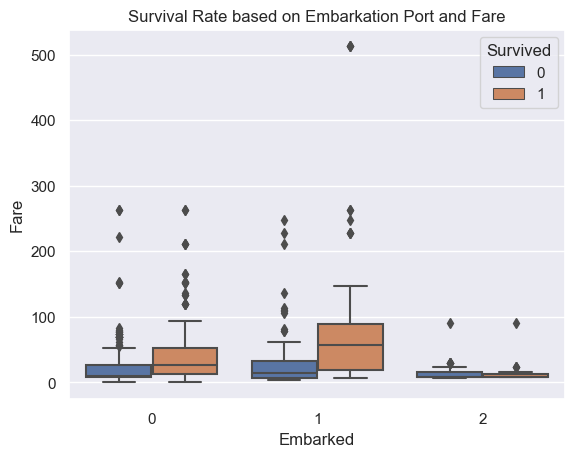

In [75]:
# visualize the survival rate based on embarkation port and fare
sns.boxplot(x='Embarked', y='Fare', hue='Survived', data=titanic)
plt.title('Survival Rate based on Embarkation Port and Fare')
plt.show()

How much you paid wouldn't necessary affect the survival rate, but it's great to visualize it. We do notice that those in port 'C' paid more, which could mean that more people who could afford class 1 came from that port.

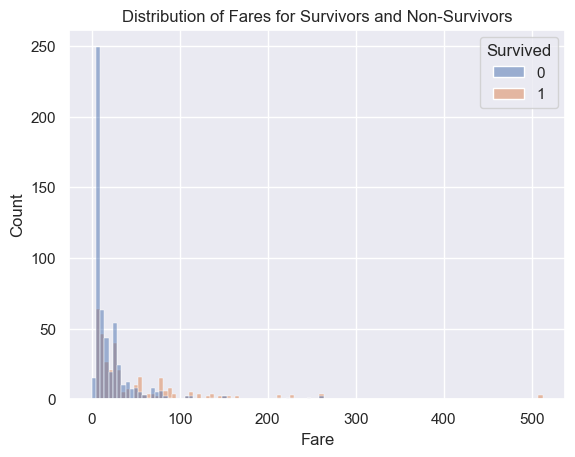

In [76]:
# visualize the distribution of fares for survivors and non-survivors
sns.histplot(x='Fare', hue='Survived', data=titanic)
plt.title('Distribution of Fares for Survivors and Non-Survivors')
plt.show()

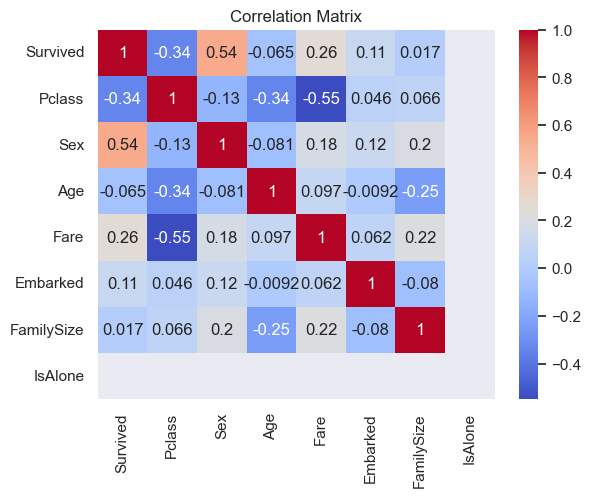

In [77]:
# visualize the correlation between features
correlation_matrix = titanic.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Checking the correlation matrix to see if there are any columns that depend on each other, but it seems there are none. We can move straight to where prepare our data for prediction.

In [78]:
# converting categorical columns
titanic = titanic.replace({'Sex':{'male':0, 'female':1}, 'Embarked':{'S':0, 'C':1, 'Q':2}})

### Model preparation

In [54]:
# import necessary libraries for machine learning
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV

There are two models I already tested in my model selection notebook that I'll use here, Random Forest Classifier and XGBoost Classifier. 

#### Train Test Split

###### separating and scaling the data for prediction analysis

In [55]:
# split the data into features (X) and target (y)
X = titanic.drop(['Survived', 'Fare'], axis=1)
y = titanic['Survived']

In [56]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [57]:
# peform feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

From the above processes, we separated our data into features and target, then splited it into training data and testing data. Though our dataset is quite small, I scaled it so as to get effective results. Scaling data really helps especially with large datasets.

#### using XGBoost Classifier

###### performing hyper-parameter tuning to find the best fit

In [58]:
# define the parameter grid for hyperparameter tuning
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

In [59]:
# create the XGBoost model
model = XGBClassifier()

In [60]:
# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 0.9, 1.0]})

In [61]:
# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score}")

Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Best Score: 0.8300403821530582


###### training the model with the best parameters  

In [62]:
# use the best parameters to train the final model
final_model = XGBClassifier(**best_params)
final_model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [63]:
# make predictions on the test set using the final model
y_pred = final_model.predict(X_test_scaled)

### Model Evaluation on XGBClassifier

In [64]:
# Evaluate the final model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100}")

Accuracy: 82.12290502793296


In [65]:
# using the confusion matrix
print(confusion_matrix(y_test, y_pred))

[[96  9]
 [23 51]]


From our confusion matrix, our model predicted 96 correctly of the survival out of 105 and 51 correctly of the non survivors out of 74

Using the XGBClassifier model, we see that our model is quite good at predicting, thus we are good to go.

#### using Random Forest Classifier

In [79]:
# train the random forest classifier
model_1 = RandomForestClassifier(n_estimators=100, random_state=42)
model_1.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [80]:
# make predictions on the test set
y_pred = model_1.predict(X_test)

### Model Evaluation on Random Forest Classifier

In [83]:
# Evaluate the final model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100}")

Accuracy: 81.56424581005587


In [84]:
# using the confusion matrix
print(confusion_matrix(y_test, y_pred))

[[92 13]
 [20 54]]


From our confusion matrix, our model predicted 92 correctly of the survival out of 105 and 54 correctly of the non survivors out of 74

Our Random Forest Classifier is also quite good at prediction, but the XGBClassifier is best.